# Import Packages

In [9]:
check.packages = function(pkg) {
    new.pkg = pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = TRUE)
    sapply(pkg, require, character.only = TRUE)
}

In [12]:
check.packages(c('RPostgreSQL', 'ggplot2', 'dplyr', 'gridExtra', 'cowplot'))

RPostgreSQL     ggplot2       dplyr   gridExtra     cowplot 
       TRUE        TRUE        TRUE        TRUE        TRUE

In [13]:
options(scipen=999)

# Import Data

In [24]:
## For Previous 4 cohort
# df = read.csv('C:/Users/jchang/Desktop/Projects/Automate FR Meetings/data/_2019-1-21_0823.csv')

## For Previous 4 cohort (SNAPSHOT)
# df = read.csv('C:/Users/jchang/Desktop/Projects/Automate FR Meetings/data/datadeltassnapshot_2019-1-21_0902.csv')

## For Previous 4 cohort (SNAPSHOT - 2 WITH HEAP)
df = read.csv('C:/Users/jchang/Desktop/Projects/Automate FR Meetings/data/datadeltassnapshotheap_2019-1-21_2035.csv')

## For Previous 1 cohort (SNAPSHOT - 2 WITH HEAP)
# df = read.csv('C:/Users/jchang/Desktop/Projects/Automate FR Meetings/data/datadeltassnapshotheap_2019-1-21_2026.csv')


df

period,start_date,end_date,attemptq,bvattempt,scorecardbv,contractscorecard,decisionedcontract,fundeddecisioned,fundingrate
P1,2018-12-17,2019-01-13,0.6690729,0.9480782,0.6635135,0.7954229,0.7649080,0.7869979,0.2015339
P2,2019-01-14,2019-01-20,0.6574117,0.9572050,0.6690120,0.7633655,0.7850172,0.7897623,0.1992436


# Construct Data Frame for Deltas ggplot

In [25]:
getDeltasMaturedDF = function() {
    
    levers = c(
        '2Attempt IBV', 
        '3Complete IBV',
        '4Pass Scorecard', 
        '5Contract Signed', 
        '6Decisioned', 
        '7Funded/Decisioned', 
        'Funding Rate'
    )
    
    bridge = c(
        df$attemptq[which(df$period == "P2")] - df$attemptq[which(df$period == "P1")],
        df$bvattempt[which(df$period == "P2")] - df$bvattempt[which(df$period == "P1")],
        df$scorecardbv[which(df$period == "P2")] - df$scorecardbv[which(df$period == "P1")],
        df$contractscorecard[which(df$period == "P2")] - df$contractscorecard[which(df$period == "P1")],
        df$decisionedcontract[which(df$period == "P2")] - df$decisionedcontract[which(df$period == "P1")],
        df$fundeddecisioned[which(df$period == "P2")] - df$fundeddecisioned[which(df$period == "P1")],
        df$fundingrate[which(df$period == "P2")] - df$fundingrate[which(df$period == "P1")]
    )
    
    color = c(
        ifelse(bridge[1] >= 0, "green", "red"),
        ifelse(bridge[2] >= 0, "green", "red"),
        ifelse(bridge[3] >= 0, "green", "red"),
        ifelse(bridge[4] >= 0, "green", "red"),
        ifelse(bridge[5] >= 0, "green", "red"),
        ifelse(bridge[6] >= 0, "green", "red"),
        ifelse(bridge[7] >= 0, "green", "red")
    )
    
    values.format = c(
        paste(round(10000 * bridge, 0), "bps", sep = " ")
    )
    
    df.deltas = data.frame(
        levers, 
        bridge, 
        color, 
        values.format
    )    
    
    return(df.deltas)    
}

In [26]:
getDeltasSnapshotDF = function() {
    
    levers = c(
        '2BV/Q', 
        '3Pass Scorecard', 
        '4Contract Signed', 
        '5Decisioned', 
        '6Funded/Decisioned', 
        'Funding Rate'
    )
    
    bridge = c(
        df$bvq[which(df$period == "P2")] - df$bvq[which(df$period == "P1")],
        df$scorecardbv[which(df$period == "P2")] - df$scorecardbv[which(df$period == "P1")],
        df$contractscorecard[which(df$period == "P2")] - df$contractscorecard[which(df$period == "P1")],
        df$decisionedcontract[which(df$period == "P2")] - df$decisionedcontract[which(df$period == "P1")],
        df$fundeddecisioned[which(df$period == "P2")] - df$fundeddecisioned[which(df$period == "P1")],
        df$fundingrate[which(df$period == "P2")] - df$fundingrate[which(df$period == "P1")]
    )
    
    color = c(
        ifelse(bridge[1] >= 0, "green", "red"),
        ifelse(bridge[2] >= 0, "green", "red"),
        ifelse(bridge[3] >= 0, "green", "red"),
        ifelse(bridge[4] >= 0, "green", "red"),
        ifelse(bridge[5] >= 0, "green", "red"),
        ifelse(bridge[6] >= 0, "green", "red")
    )
    
    values.format = c(
        paste(round(10000 * bridge, 0), "bps", sep = " ")
    )
    
    df.deltas = data.frame(
        levers, 
        bridge, 
        color, 
        values.format
    )    
    
    return(df.deltas)    
}

In [27]:
getDeltasDF = function(snapshot = FALSE) {
    
    if (snapshot == FALSE) {
        deltas.final = getDeltasMaturedDF()
    } else if (snapshot == TRUE) {
        deltas.final = getDeltasSnapshotDF()
    }
        
    return(deltas.final)    
}

df.deltas = getDeltasDF(snapshot = FALSE)
df.deltas

levers,bridge,color,values.format
2Attempt IBV,-0.011661185,red,-117 bps
3Complete IBV,0.009126775,green,91 bps
4Pass Scorecard,0.005498506,green,55 bps
5Contract Signed,-0.032057406,red,-321 bps
6Decisioned,0.020109197,green,201 bps
7Funded/Decisioned,0.002764454,green,28 bps
Funding Rate,-0.002290338,red,-23 bps


# Construct Deltas ggplot

In [28]:
theme_set(theme_bw())

getDeltasPlot = function(snapshot = FALSE) {
    
    deltas.plot = ggplot(
        data = getDeltasDF(snapshot = snapshot), 
        mapping = aes(
            x = levers, 
            y = bridge * 10000, 
            fill = color
        )
    ) + 
    geom_col() +
    scale_fill_manual(
        'legend', 
        values = c('red' = 'brown1', 'green' = 'springgreen4')
    ) +
    geom_text(
        aes(
            label = values.format
        ), 
        position = "stack", 
        vjust = -0.5, 
        size = 4.0
    ) + 
    labs(
        x = "Levers", 
        y = "BPS", 
        title = paste(
            "Funding Rate Bridge - Conversion Deltas", 
            "\n", "From ", df$start_date[which(df$period == "P1")], " to ", df$end_date[which(df$period == "P1")], 
            "\n", "Through ", df$start_date[which(df$period == "P2")], " to ", df$end_date[which(df$period == "P2")]
        )
    ) + 
    theme(
        plot.title = element_text(
            hjust = 0.5
        ), 
        legend.position = "none", 
        axis.text.x = element_text(
            angle = 45, 
            vjust = 1, 
            hjust = 1)
    )
    
    return(deltas.plot)
}

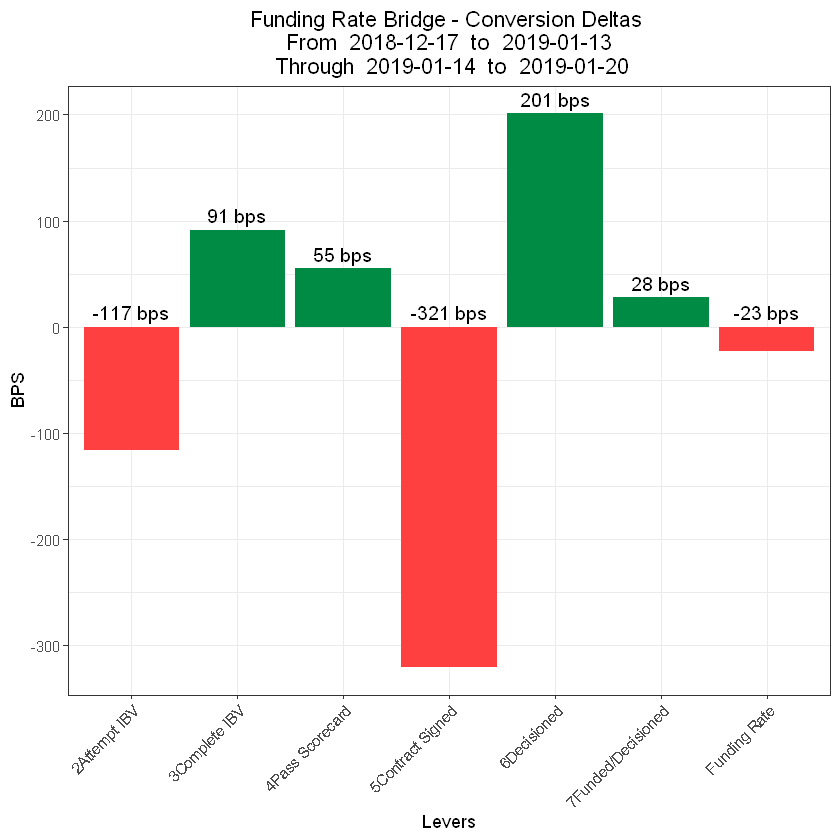

In [29]:
deltas.plot = getDeltasPlot(snapshot = FALSE)
# deltas.plot = getDeltasPlot(snapshot = TRUE)

deltas.plot

In [20]:
# library(ggplot2)

# levers = c("2Attempt IBV", "3Complete IBV", "4Pass Scorecard", "5Contract Signed", "6Decisioned", "7Funded/Decisioned", "Funding Rate")
# bridge = c((df$attemptq[which(df$period == "P2")]-df$attemptq[which(df$period == "P1")])
#            , (df$bvattempt[which(df$period == "P2")]-df$bvattempt[which(df$period == "P1")])
#            , (df$scorecardbv[which(df$period == "P2")]-df$scorecardbv[which(df$period == "P1")])
#            , (df$contractscorecard[which(df$period == "P2")]-df$contractscorecard[which(df$period == "P1")])
#            , (df$decisionedcontract[which(df$period == "P2")]-df$decisionedcontract[which(df$period == "P1")])
#            , (df$fundeddecisioned[which(df$period == "P2")]-df$fundeddecisioned[which(df$period == "P1")])
#            , (df$fundingrate[which(df$period == "P2")]-df$fundingrate[which(df$period == "P1")]))

# color = c(ifelse(bridge[1] >= 0, "green", "red")
#           , ifelse(bridge[2] >= 0, "green", "red")
#           , ifelse(bridge[3] >= 0, "green", "red")
#           , ifelse(bridge[4] >= 0, "green", "red")
#           , ifelse(bridge[5] >= 0, "green", "red")
#           , ifelse(bridge[6] >= 0, "green", "red")
#           , ifelse(bridge[7] >= 0, "green", "red"))

# values_format = c(paste(round(10000*bridge, 0), "bps", sep = " "))

# df2 = data.frame(levers, bridge, color, values_format)

# p1 = ggplot(data = df2, mapping = aes(x = levers, y = bridge*10000, fill = color)) + geom_col()
# p1
# p2 = p1 + scale_fill_manual("legend", values = c("red" = "brown1", "green" = "springgreen4"))
# p2
# p3 = p2 + geom_text(aes(label = values_format), position = "stack", vjust = -0.5, size = 4.0) + labs(x = "Levers", y = "BPS", title = paste("Funding Rate Bridge - Pass Thru Rates Changes", "\n", "From ", df$startdate[which(df$period == "P1")], " to ", df$enddate[which(df$period == "P1")], "\n", "Through ", df$startdate[which(df$period == "P2")], " to ", df$enddate[which(df$period == "P2")])) + theme(plot.title = element_text(hjust = 0.5), legend.position = "none", axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))
# p3

# periscope.image()